In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = "2010-01-01"
end = "2022-02-01"


df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444382
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544689
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556004
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439795


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-26,164.389999,157.820007,163.500000,159.690002,108275300.0,159.486801
2022-01-27,163.839996,158.279999,162.449997,159.220001,121954600.0,159.017410
2022-01-28,170.350006,162.800003,165.710007,170.330002,179935700.0,170.113266
2022-01-31,175.000000,169.509995,170.160004,174.779999,115541600.0,174.557602
2022-02-01,174.839996,172.309998,174.009995,174.610001,86213900.0,174.387817


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444382
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544689
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556004
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439795


In [5]:
df = df.drop(['Date','Adj Close'],axis = 1)


In [6]:
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


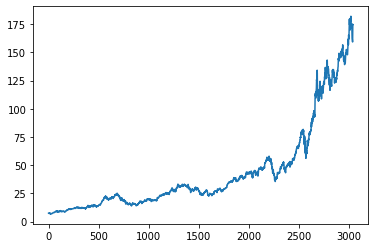

In [7]:
#Plotting closing price of stock
plt.plot(df.Close)

In [8]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
3038,164.389999,157.820007,163.500000,159.690002,108275300.0
3039,163.839996,158.279999,162.449997,159.220001,121954600.0
3040,170.350006,162.800003,165.710007,170.330002,179935700.0
3041,175.000000,169.509995,170.160004,174.779999,115541600.0


In [9]:
#Creating moving  average
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3038    158.1554
3039    158.2046
3040    158.3410
3041    158.5377
3042    158.7431
Name: Close, Length: 3043, dtype: float64

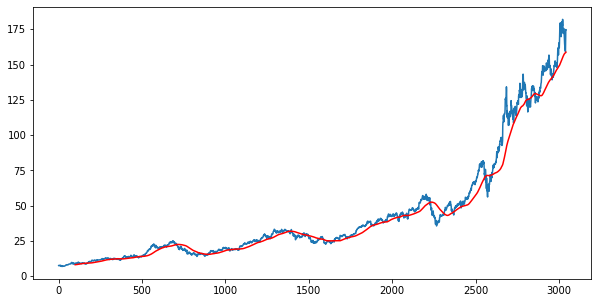

In [10]:
#plotting ma, closing price
plt.figure(figsize=(10,5))
plt.plot(df.Close)
plt.plot(ma100,'red')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3038    147.80170
3039    147.93765
3040    148.11680
3041    148.31990
3042    148.51875
Name: Close, Length: 3043, dtype: float64

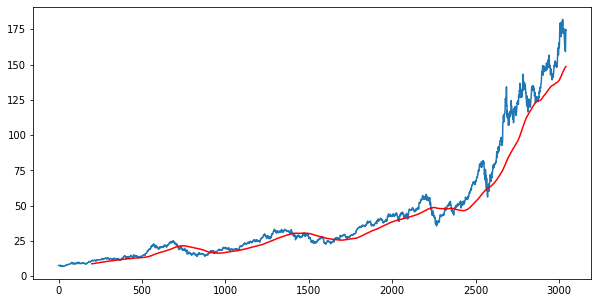

In [12]:
plt.figure(figsize=(10,5))
plt.plot(df.Close)
plt.plot(ma200,'red')

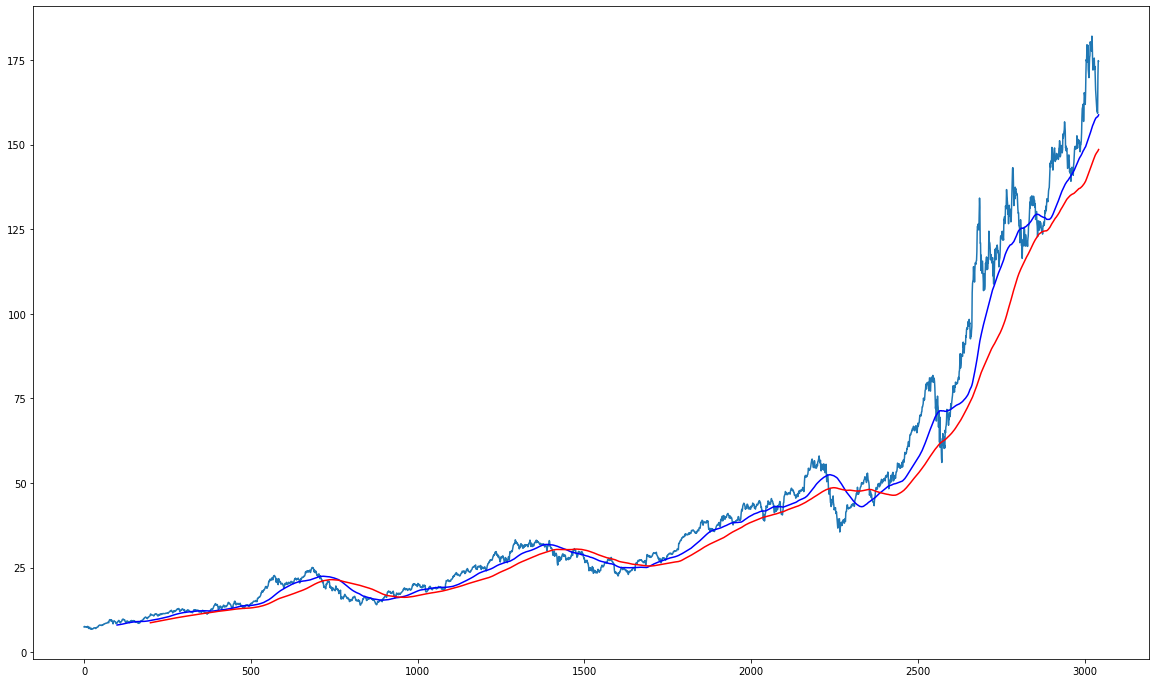

In [13]:
plt.figure(figsize=(20,12))
plt.plot(df.Close)
plt.plot(ma100,'blue')
plt.plot(ma200,'red')

In [14]:
df.shape

(3043, 5)

# Train test splitting

In [15]:
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])  # first 70% values training
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [16]:
data_train.shape

(2130, 1)

In [17]:
data_test.shape

(913, 1)

# Scaling down the data so that model learns well

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_train_array = scaler.fit_transform(data_train)
data_test_array = scaler.fit_transform(data_test)

In [20]:
data_train.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [21]:
data_train_array

array([[0.01602317],
       [0.01883667],
       [0.01915406],
       ...,
       [0.98090602],
       [0.96913734],
       [0.96853695]])

# Now divide data into x_train and y_train
Based on past 100 days data , we get the output

Then 101 day will become part of past 100 days , 1st day will be removed from x_train (function will do that) and so on.

In [22]:
data_train_array.shape

(2130, 1)

In [23]:
data_train_array[100]

array([0.04465563])

In [24]:
data_train_array[100,0] #isme array[] nikal jaata

0.04465562882955193

In [25]:
x_train = []
y_train = []


for i in range(100,data_train_array.shape[0]):
    x_train.append(data_train_array[i-100:i])#100-100 = 0(starting se lere)
    y_train.append(data_train_array[i,0])

x_train , y_train = np.array(x_train), np.array(y_train)

In [26]:
x_train.shape   #1st 100 values , 100 columns past 100 days

(2030, 100, 1)

In [27]:
len(x_train[0])

100

# Building the model


In [28]:
from tensorflow.keras.layers import Dense, Dropout,LSTM
from tensorflow.keras.models import Sequential

In [55]:
model = Sequential()
model.add(LSTM(units = 50,activation='relu',return_sequences= True,
               input_shape=(x_train.shape[1],1))) # last 1 = no of columns (only df close dekhre,aur zyada to utte)
model.add(Dropout(0.2))



model.add(LSTM(units = 60,activation='relu',return_sequences= True))
model.add(Dropout(0.3))




model.add(LSTM(units = 80,activation='relu',return_sequences= True))
model.add(Dropout(0.4))




model.add(LSTM(units = 120,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [57]:
model.compile(optimizer = "adam",loss = "mean_squared_error") #mse good for time series
model.fit(x_train,y_train,epochs = 15)

Epoch 1/15
64/64 [==============================] - 133s 2s/step - loss: 0.0381
Epoch 2/15
64/64 [==============================] - 127s 2s/step - loss: 0.0075
Epoch 3/15
64/64 [==============================] - 134s 2s/step - loss: 0.0081
Epoch 4/15
64/64 [==============================] - 135s 2s/step - loss: 0.0058
Epoch 5/15
64/64 [==============================] - 133s 2s/step - loss: 0.0055
Epoch 6/15
64/64 [==============================] - 129s 2s/step - loss: 0.0054
Epoch 7/15
64/64 [==============================] - 128s 2s/step - loss: 0.0047
Epoch 8/15
64/64 [==============================] - 125s 2s/step - loss: 0.0046
Epoch 9/15
64/64 [==============================] - 127s 2s/step - loss: 0.0045
Epoch 10/15
64/64 [==============================] - 125s 2s/step - loss: 0.0050
Epoch 11/15
64/64 [==============================] - 127s 2s/step - loss: 0.0050
Epoch 12/15
64/64 [==============================] - 133s 2s/step - loss: 0.0043
Epoch 13/15
64/64 [==================

In [ ]:
model.save("stock2.h5")

from tensorflow.keras.models import load_model
model = load_model("stock.h5")

In [33]:
data_test.head()

,Close
2130,46.422501
2131,46.625000
2132,46.365002
2133,46.230000
2134,45.542500


In [34]:
#fetch previous 100 days values 
past_100 = data_train.tail(100)

In [35]:
final_df = past_100.append(data_test,ignore_index=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_12260\1152639929.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100.append(data_test,ignore_index=True)


In [36]:
final_df.head()

,Close
0,42.777500
1,42.877499
2,41.990002
3,41.742500
4,41.857498


In [37]:
#scaling down the data
input_data= scaler.fit_transform(final_df)
input_data

array([[0.04936417],
       [0.05004693],
       [0.04398738],
       ...,
       [0.92025267],
       [0.95063586],
       [0.94947516]])

In [38]:
input_data.shape

(1013, 1)

In [44]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test2 , y_test = np.array(x_test) , np.array(y_test)
print(x_test2.shape)
print(y_test.shape)

(913, 100, 1)
(913,)


In [45]:
#predictions
y_pred = model.predict(x_test2) 

In [47]:
y_pred.shape

(913, 100, 1)

In [48]:
#scale back the values again
scaler.scale_  #This is the value by which all points in the data were divided to come into range

array([0.00682769])

In [49]:
scale_factor = 1/(scaler.scale_)

In [50]:
y_pred = y_pred*scale_factor
y_test = y_test*scale_factor

In [51]:
y_test.shape

(913,)

In [52]:
y_pred.shape

(913, 100, 1)

In [ ]:
!streamlit run app.py

In [1]:
from keras.models import load_model
model = load_model('stock.h5')

In [ ]:
streamlit --help